In [13]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Path where all the files are stored
path =r'C:\Users\ds512590\Downloads\GDP_Assignment'

# Reading file from the paths
part_1a = pd.read_csv(path+'/ab40c054-5031-4376-b52e-9813e776f65e.csv')

#removing UT and NA value column (West Bengal1) adn Imputing NA with mean
part_1a = part_1a.drop(['Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry', 'West Bengal1'],axis=1)

In [15]:
#Nation's growth rate
Nation_growth_rate = part_1a.loc[part_1a['Items  Description'] == '(% Growth over previous year)']
Nation_growth_rate['All_India GDP'].mean()

11.797999999999998

In [16]:
#Home State growth rate
Home_growth_rate = part_1a.loc[part_1a['Items  Description'] == '(% Growth over previous year)']
Home_growth_rate['Rajasthan'].mean()

11.94

My Home state(Rajasthan) growth is 0.15% extra then Natinon's Growth

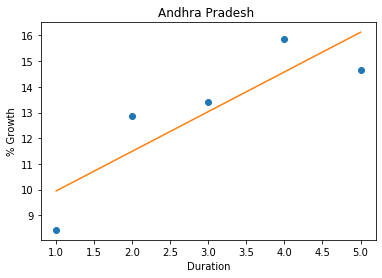

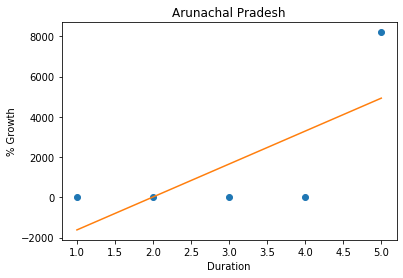

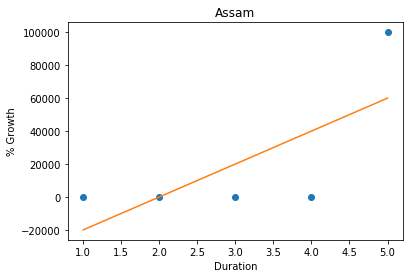

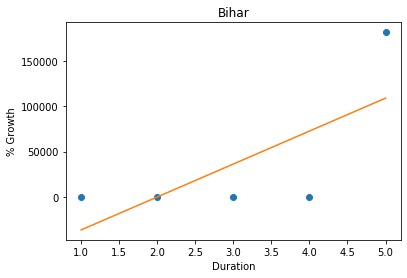

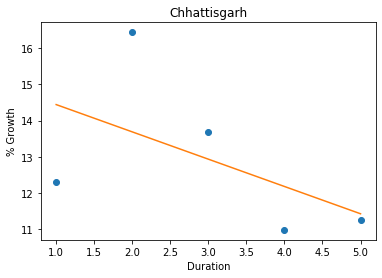

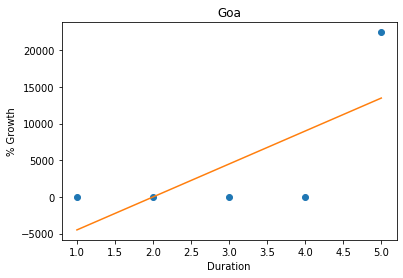

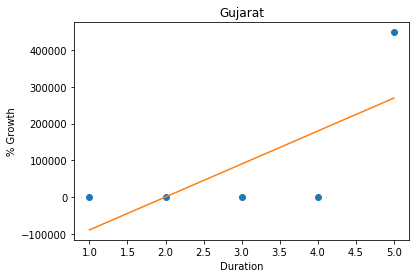

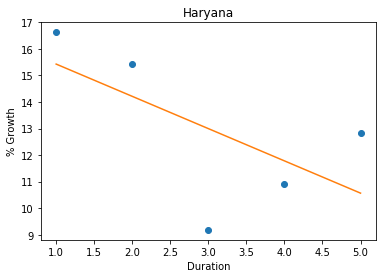

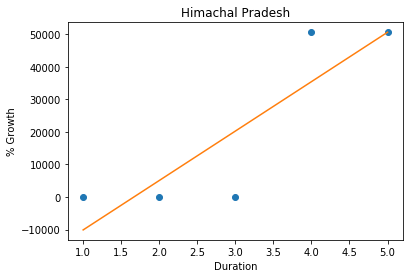

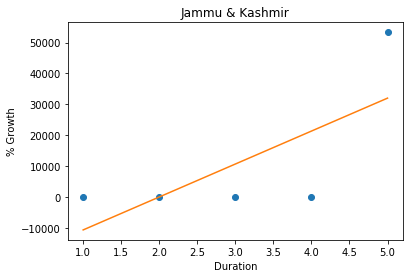

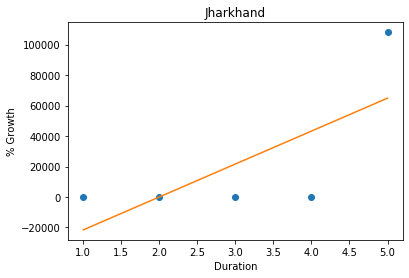

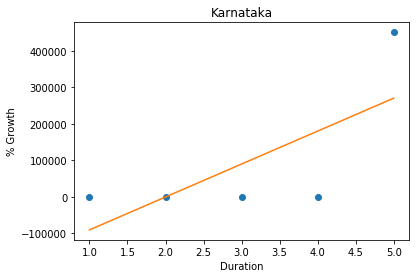

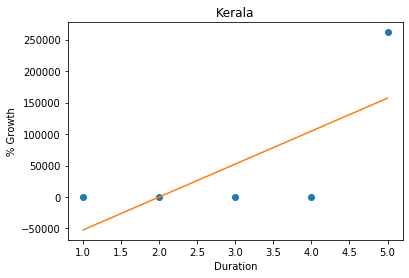

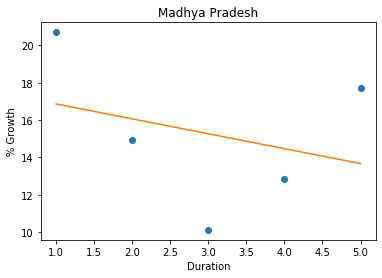

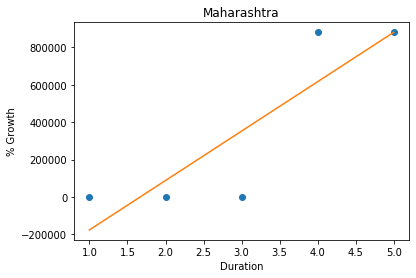

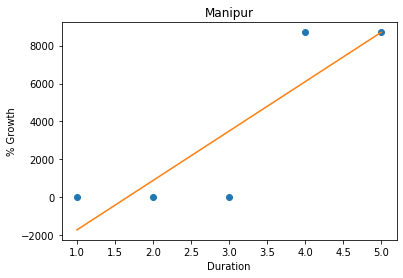

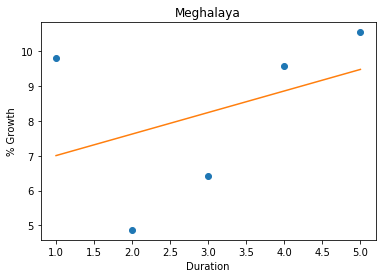

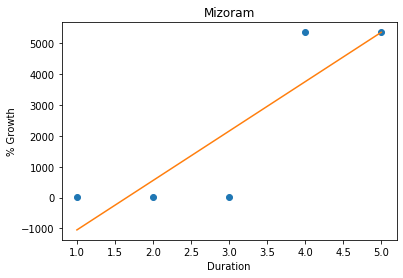

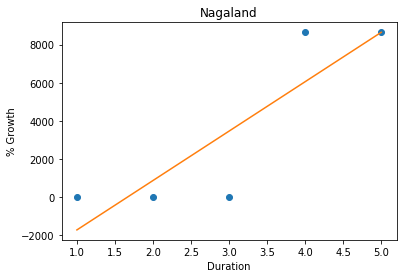

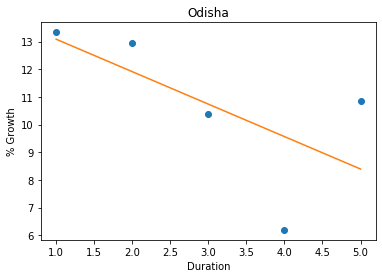

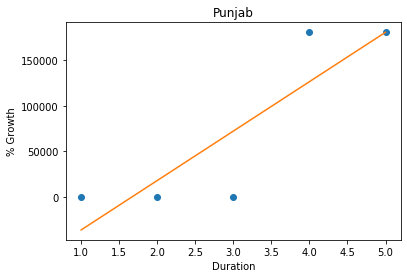

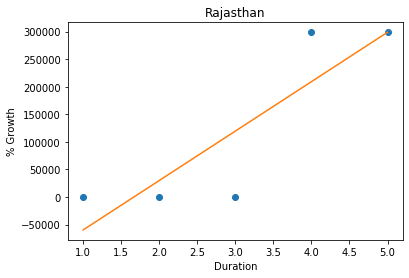

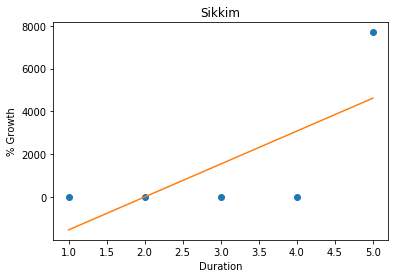

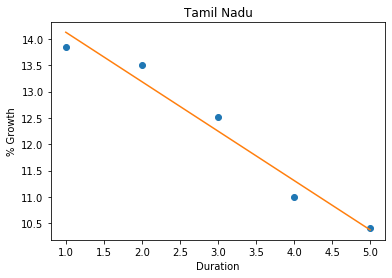

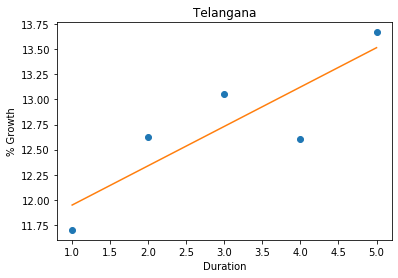

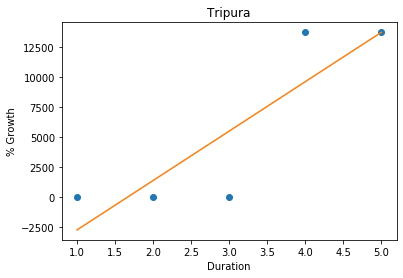

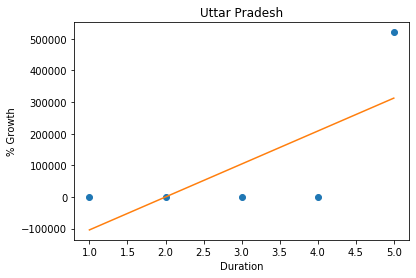

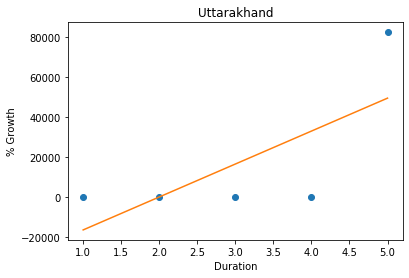

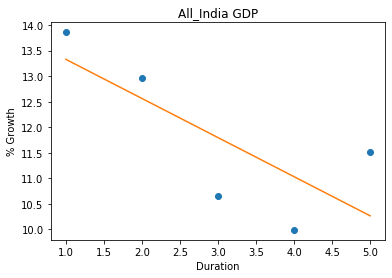

In [17]:
#best fit line graph for " % Growth over previous year" for each state & Nation
part_1a.fillna(part_1a.mean(),inplace = True)
df_perc_growth = part_1a.loc[part_1a['Items  Description'] == '(% Growth over previous year)']
df_perc_growth = df_perc_growth.drop(['Items  Description','Duration'],axis=1)
state_list = list(df_perc_growth.columns)
x_val = [1,2,3,4,5]
for state in state_list:
    
    plt.title(state)
    plt.xlabel('Duration')
    plt.ylabel('% Growth')
    plt.plot(x_val, df_perc_growth[state], 'o')
    m = np.polyfit(x_val, df_perc_growth[state],1)
    y = np.polyval(m,x_val)
    plt.plot(x_val, y)
    plt.show()

Text(0, 0.5, 'GSDP - CURRENT PRICES (` in Crore)')

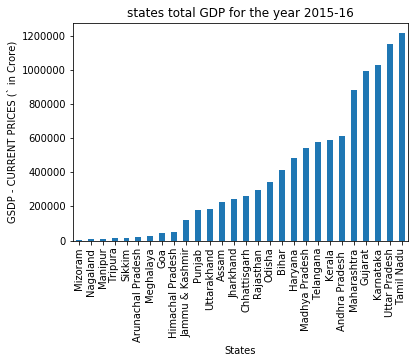

In [18]:
#Plot the total GDP of the states for the year 2015-16

total_gdp = part_1a.loc[(part_1a['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)')&(part_1a['Duration'] =='2015-16')]
total_gdp = total_gdp.drop(['Duration','Items  Description', 'All_India GDP'], axis =1)
total_gdp = total_gdp.T.dropna()
total_gdp.iloc[:,-1].sort_values().plot(kind='bar')
plt.title('states total GDP for the year 2015-16')
plt.xlabel('States')
plt.ylabel('GSDP - CURRENT PRICES (` in Crore)')

I am Using Bar Graph as it is easily showing which state is performing well.
So top 5 states based on total GDP:
1. Andhra Pradesh
2. Gujarat
3. Karnataka
4. Uttar Pradesh
5. Tamil Nadu

bottom 5 states based on total GDP:
1. Sikkim
2. Arunachal Pradesh
3. Meghalaya
4. Goa
5. Jammu & Kashmir

In [19]:
# Reading all the files from paths required for Part 1-B

all_files = glob.glob(path+'/NAD*.csv')

In [20]:
# Empty list to add all the States dataframes
file_list = []

# Loop to read each file with the path given in the all_files variable.
for file in all_files:
    # Selecting only required files for 1-B
    df = pd.read_csv(file, encoding = 'cp1252')
    df = df[['Item','2014-15']]
    df = df.set_index('Item')
    df = df.T
    df.loc[:,'State'] = file.split('-')[1].split('-')[0]
    file_list.append(df)

fin_df = pd.concat(file_list, axis=0, ignore_index=True, sort = False)

#Filtered out the union territories for further analysis
fin_df = fin_df.loc[(fin_df['State'] != 'Puducherry') & (fin_df['State'] != 'Delhi')&(fin_df['State'] != 'Chandigarh')&(fin_df['State'] != 'Andaman_Nicobar_Islands')]
fin_df.head()


,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),State,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
1,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,5512100.0,1690800.0,52646842.0,501510.0,104977.0,Andhra_Pradesh,NaN,NaN,NaN,NaN
2,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,70099.0,30272.0,1676119.0,14870.0,112718.0,Arunachal_Pradesh,NaN,NaN,NaN,NaN
3,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,...,1725309.0,582406.0,19809800.0,326780.0,60621.0,Assam,NaN,NaN,NaN,NaN
4,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,...,3213546.0,2006421.0,37391988.0,1101240.0,33954.0,Bihar,NaN,NaN,NaN,NaN
6,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,...,2601791.0,1332092.0,23498180.0,270530.0,86860.0,Chhattisgarh,NaN,NaN,NaN,NaN


<BarContainer object of 28 artists>

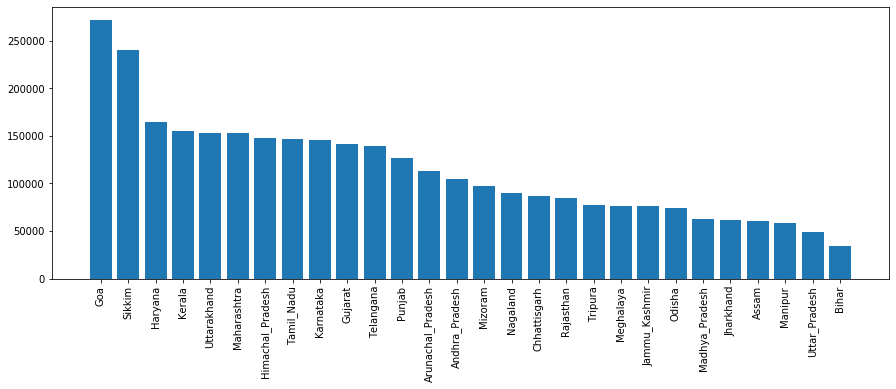

In [21]:
#Plot of the GDP per capita for all the states

plt_df = fin_df.sort_values('Per Capita GSDP (Rs.)', ascending = False)
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
plt.bar(plt_df['State'],plt_df['Per Capita GSDP (Rs.)'])

In [22]:
top5 = plt_df.iloc[:5, ]
top5['State']

8             Goa
26         Sikkim
10        Haryana
15         Kerala
30    Uttarakhand
Name: State, dtype: object

In [23]:
bottom5 = plt_df.iloc[-5:]
bottom5['State']

13        Jharkhand
3             Assam
18          Manipur
31    Uttar_Pradesh
4             Bihar
Name: State, dtype: object

In [24]:
#Ratio of the highest per capita GDP to the lowest per capita GDP.

plt_df['Per Capita GSDP (Rs.)'].max()/plt_df['Per Capita GSDP (Rs.)'].min()

8.004741709371503

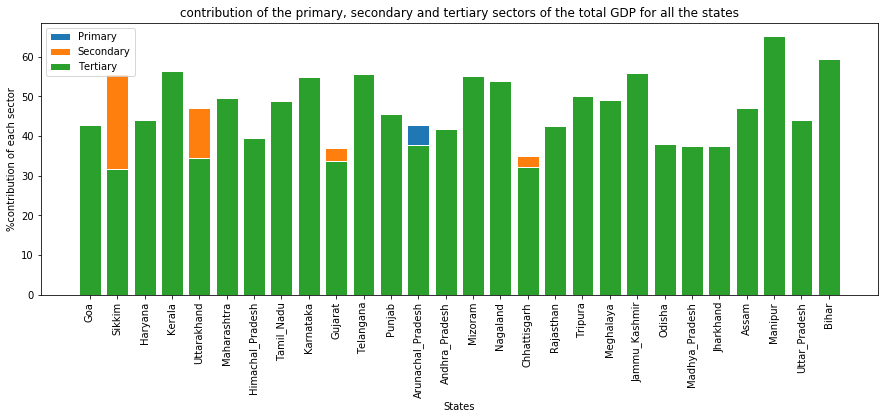

In [26]:
#percentage contribution of the primary, secondary and tertiary sectors 
#as a percentage of the total GDP for all the states

plt_df['% Primary Contri'] = (plt_df['Primary']/plt_df['Gross State Domestic Product'])*100
plt_df['% Secondary Contri'] = (plt_df['Secondary']/plt_df['Gross State Domestic Product'])*100
plt_df['% Tertiary Contri'] = (plt_df['Tertiary']/plt_df['Gross State Domestic Product'])*100
plt_df['corr_gdp_pri_sec_ter'] = plt_df['Gross State Domestic Product'].corr(plt_df['% Primary Contri'])

plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')

p1 = plt.bar(plt_df['State'], plt_df['% Primary Contri'], edgecolor='white')
p2 = plt.bar(plt_df['State'], plt_df['% Secondary Contri'], edgecolor='white')
p3 = plt.bar(plt_df['State'], plt_df['% Tertiary Contri'], edgecolor='white')
plt.title('contribution of the primary, secondary and tertiary sectors of the total GDP for all the states')
plt.xlabel('States')
plt.ylabel('%contribution of each sector')
plt.legend((p1[0], p2[0], p3[0]), ('Primary', 'Secondary', 'Tertiary'))


Text(0, 0.5, '%contribution of Primary sector')

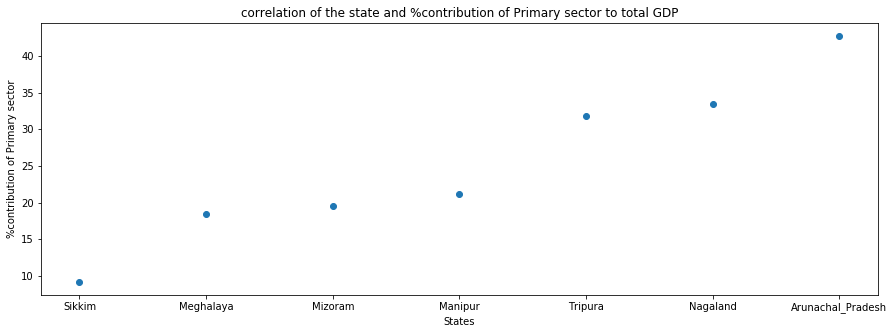

In [27]:
#correlation of percentile of the state (% of states with lower per capita GDP) 
#and %contribution of Primary sector to total GDP.

new_corr_df = plt_df.sort_values('% Primary Contri')
new_corr_df['lower_gdp_state'] = pd.qcut(plt_df['Gross State Domestic Product'], q = [0, 0.25],labels = ["Lower"])
new_corr_df = new_corr_df.loc[new_corr_df['lower_gdp_state'] == 'Lower']
plt.figure(figsize=(15,5))

plt.scatter(new_corr_df['State'],new_corr_df['% Primary Contri'])
plt.title('correlation of the state and %contribution of Primary sector to total GDP')
plt.xlabel('States')
plt.ylabel('%contribution of Primary sector')

In [28]:
plt_df['percentile_of_state'] = (plt_df['Gross State Domestic Product'].rank(pct=True))*100

#correlation of percentile of the state (% of states with lower per capita GDP) 
#and %contribution of Primary sector to total GDP.

plt_df['corr_state_primary'] = plt_df['percentile_of_state'].corr(plt_df['% Primary Contri'])
plt_df.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*,% Primary Contri,% Secondary Contri,% Tertiary Contri,corr_gdp_pri_sec_ter,percentile_of_state,corr_state_primary
8,308507.0,140421.0,30141.0,15744.0,122201.0,3622.0,312129.0,1177608.0,204110.0,165819.0,...,NaN,NaN,NaN,NaN,7.681649,38.085628,42.778382,-0.218746,28.571429,-0.123974
26,137447.0,114976.0,17338.0,4529.0,604.0,1329.0,138776.0,550697.0,212499.0,82058.0,...,NaN,NaN,NaN,NaN,9.124399,55.574637,31.763595,-0.218746,7.142857,-0.123974
10,8015238.0,4636731.0,2916173.0,352254.0,110080.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,...,NaN,NaN,NaN,NaN,18.379705,28.714286,43.950252,-0.218746,64.285714,-0.123974
15,5930617.0,3070386.0,1656104.0,499808.0,704319.0,558824.0,6489442.0,4273567.0,482470.0,7314003.0,...,NaN,7763847.0,2761427.0,NaN,12.337288,22.946744,56.413780,-0.218746,75.000000,-0.123974
30,1601423.0,866146.0,391188.0,339293.0,4796.0,244549.0,1845972.0,5866252.0,433880.0,1342733.0,...,NaN,NaN,NaN,307147.0,11.395924,47.182463,34.496805,-0.218746,39.285714,-0.123974


In [29]:
#Categorise the states into four groups based on the GDP per capita 
#(C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest).The quantile values are (0.20,0.5, 0.85, 1)

plt_df['quant_categories']= pd.qcut(plt_df['Per Capita GSDP (Rs.)'], q = [0, 0.20, 0.5, 0.85, 1],labels = ["C4", "C3", "C2","C1"])
plt_df.head(5)

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Trade & repair services*,Road transport**,Road transport*,% Primary Contri,% Secondary Contri,% Tertiary Contri,corr_gdp_pri_sec_ter,percentile_of_state,corr_state_primary,quant_categories
8,308507.0,140421.0,30141.0,15744.0,122201.0,3622.0,312129.0,1177608.0,204110.0,165819.0,...,NaN,NaN,NaN,7.681649,38.085628,42.778382,-0.218746,28.571429,-0.123974,C1
26,137447.0,114976.0,17338.0,4529.0,604.0,1329.0,138776.0,550697.0,212499.0,82058.0,...,NaN,NaN,NaN,9.124399,55.574637,31.763595,-0.218746,7.142857,-0.123974,C1
10,8015238.0,4636731.0,2916173.0,352254.0,110080.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,...,NaN,NaN,NaN,18.379705,28.714286,43.950252,-0.218746,64.285714,-0.123974,C1
15,5930617.0,3070386.0,1656104.0,499808.0,704319.0,558824.0,6489442.0,4273567.0,482470.0,7314003.0,...,7763847.0,2761427.0,NaN,12.337288,22.946744,56.413780,-0.218746,75.000000,-0.123974,C1
30,1601423.0,866146.0,391188.0,339293.0,4796.0,244549.0,1845972.0,5866252.0,433880.0,1342733.0,...,NaN,NaN,307147.0,11.395924,47.182463,34.496805,-0.218746,39.285714,-0.123974,C1


In [30]:
part2_df = pd.read_csv(path+'/rs_session243_au570_1.1.csv')
part2_df = part2_df.drop(['Primary - 2012-2013', 'Primary - 2014-2015.1','Upper Primary - 2012-2013','Upper Primary - 2013-2014',
'Secondary - 2012-2013','Secondary - 2013-2014','Senior Secondary - 2012-2013',
'Senior Secondary - 2013-2014','Senior Secondary - 2014-2015'], axis =1)
part2_df.set_index('Sl. No.')
part2_df = part2_df.rename(columns = {"Level of Education - State": "State"}) 
df_merge= pd.merge(plt_df, part2_df, on='State', how='inner')

In [31]:
#Correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?

df_merge['corr_prim_prim'] = df_merge['Primary - 2014-2015'].corr(plt_df['% Primary Contri'])
df_merge['corr_Upper_prim'] = df_merge['Upper Primary - 2014-2015'].corr(plt_df['% Primary Contri'])
df_merge['corr_Secon_prim'] = df_merge['Secondary - 2014-2015'].corr(plt_df['% Primary Contri'])
df_merge['corr_prim_second'] = df_merge['Primary - 2014-2015'].corr(plt_df['% Secondary Contri'])
df_merge['corr_Upper_second'] = df_merge['Upper Primary - 2014-2015'].corr(plt_df['% Secondary Contri'])
df_merge['corr_Secon_second'] = df_merge['Secondary - 2014-2015'].corr(plt_df['% Secondary Contri'])
df_merge['corr_prim_tertiary'] = df_merge['Primary - 2014-2015'].corr(plt_df['% Tertiary Contri'])
df_merge['corr_Upper_trtiary'] = df_merge['Upper Primary - 2014-2015'].corr(plt_df['% Tertiary Contri'])
df_merge['corr_Secon_tertiary'] = df_merge['Secondary - 2014-2015'].corr(plt_df['% Tertiary Contri'])
df_merge.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Secondary - 2014-2015,corr_prim_prim,corr_Upper_prim,corr_Secon_prim,corr_prim_second,corr_Upper_second,corr_Secon_second,corr_prim_tertiary,corr_Upper_trtiary,corr_Secon_tertiary
0,308507.0,140421.0,30141.0,15744.0,122201.0,3622.0,312129.0,1177608.0,204110.0,165819.0,...,11.15,-0.258445,0.295595,0.061265,0.321579,0.021648,-0.226073,-0.2137,-0.307912,0.183171
1,137447.0,114976.0,17338.0,4529.0,604.0,1329.0,138776.0,550697.0,212499.0,82058.0,...,15.89,-0.258445,0.295595,0.061265,0.321579,0.021648,-0.226073,-0.2137,-0.307912,0.183171
2,8015238.0,4636731.0,2916173.0,352254.0,110080.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,...,15.89,-0.258445,0.295595,0.061265,0.321579,0.021648,-0.226073,-0.2137,-0.307912,0.183171
3,5930617.0,3070386.0,1656104.0,499808.0,704319.0,558824.0,6489442.0,4273567.0,482470.0,7314003.0,...,12.32,-0.258445,0.295595,0.061265,0.321579,0.021648,-0.226073,-0.2137,-0.307912,0.183171
4,16475655.0,10435121.0,3972829.0,1592564.0,475141.0,5282727.0,21758383.0,33660294.0,4334702.0,9450211.0,...,12.87,-0.258445,0.295595,0.061265,0.321579,0.021648,-0.226073,-0.2137,-0.307912,0.183171


(6.0, 0.0)

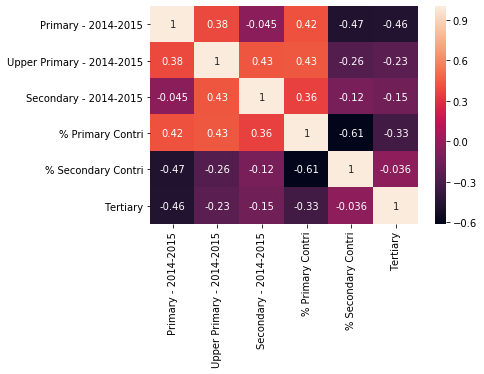

In [32]:
df_dropout_sec_corr = df_merge[['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015','% Primary Contri','% Secondary Contri','Tertiary']]
cor = df_dropout_sec_corr.corr()

ax = sns.heatmap(cor, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Yes there is a correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP. As correlation shown in above map, below points are clear:
1. As primary sector contribution increases then drop out in all eduction increases..
2. For secondary sector contribution increases then drop out in all eduction decreases.
3. Same for tertiary sector contribution increases then drop out in all eduction decreases.

Text(0, 0.5, 'dropout rates')

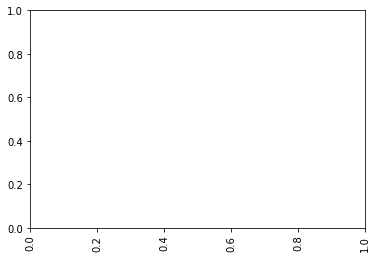

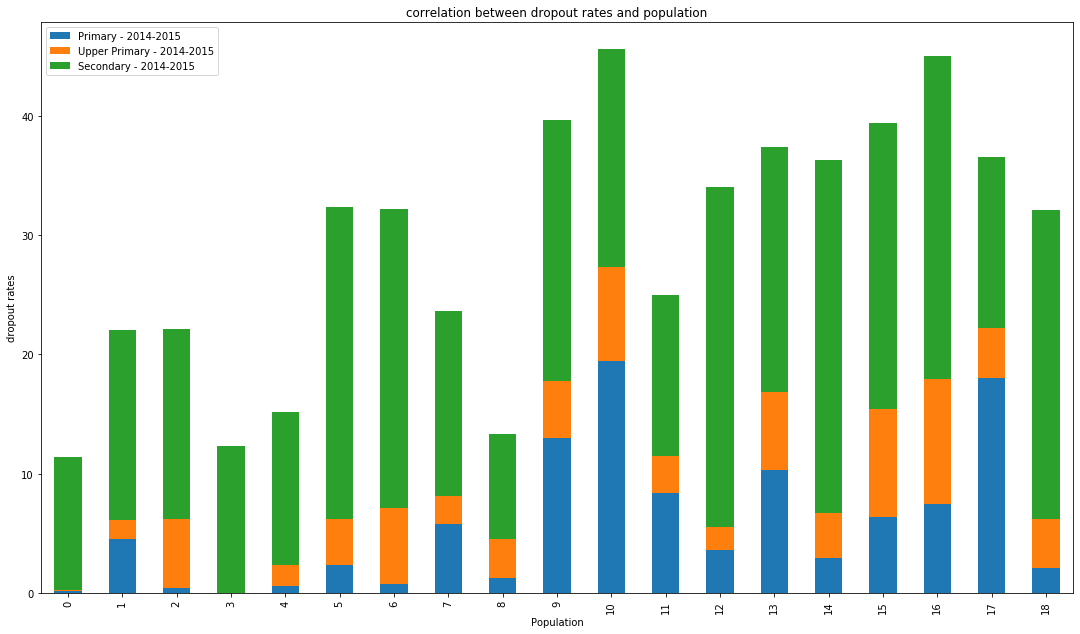

In [33]:
df_merge_new = df_merge.rename(columns = {"Population ('00)": "Population (00)"}) 
plt.xticks(rotation='vertical')
df_merge_new = df_merge_new[['State', 'Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]
df_merge_new.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
plt.title('correlation between dropout rates and population')
plt.xlabel('Population')
plt.ylabel('dropout rates')

Most of the population which are contributing are Secodary educated
